In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_table('./data/round1_ijcai_18_train_20180301.txt', sep=' ')
data.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,...,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,...,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [3]:
ads_data = data[['item_id', 'item_category_list', 'item_property_list', 'item_brand_id', 'item_city_id', 
                 'item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'is_trade']]
ads_data.head()

,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,is_trade
0,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0
1,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0
2,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0
3,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0
4,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,0


In [4]:
def feature_group(data, feature, is_trade):
    if (is_trade != 1 and is_trade != 0):
        return None
    else:
        data = data[[feature, 'is_trade']]
        data_feature = data[data['is_trade'] == is_trade]
        data_feature = data_feature.reset_index(drop=True)
        data_feature_grouped = data_feature.groupby([feature]).count()
        data_feature_grouped = data_feature_grouped.reset_index()
        data_feature_grouped = data_feature_grouped.sort_values(['is_trade'], ascending=False)
    return data_feature_grouped

In [5]:
def feature_log_cal(data_feature_grouped, feature, is_trade):
    if (is_trade != 1 and is_trade != 0):
        return None
    else:
        new_feature = feature + '_' + str(is_trade)
        data_feature_grouped[new_feature] = np.log(data_feature_grouped['is_trade'] / len(data_feature_grouped))
#         # 0-1标准化
#         data_feature_grouped[new_feature] =  (data_feature_grouped['is_trade'] - data_feature_grouped['is_trade'].min())/\
#                                         (data_feature_grouped['is_trade'].max() - data_feature_grouped['is_trade'].min())
    return data_feature_grouped

# 1. item_id

In [6]:
item_id_grouped_1 = feature_group(ads_data, 'item_id', 1)
item_id_grouped_1 = feature_log_cal(item_id_grouped_1, 'item_id', 1)
item_id_grouped_1.head()

,item_id,is_trade,item_id_1
1367,5410526681843914464,111,-3.055615
762,2986722878397696833,96,-3.200797
536,2079092401639430105,95,-3.211268
869,3444647220397515150,88,-3.287808
1293,5088920748697829728,88,-3.287808


In [7]:
item_id_grouped_0 = feature_group(ads_data, 'item_id', 0)
item_id_grouped_0 = feature_log_cal(item_id_grouped_0, 'item_id', 0)
item_id_grouped_0.head()

,item_id,is_trade,item_id_0
8247,7571023501622243456,2938,-1.229545
3286,2986722878397696833,2740,-1.299316
5915,5410526681843914464,2467,-1.404271
2272,2079092401639430105,2420,-1.423507
3018,2709839111509701702,2383,-1.438914


In [8]:
item_id_grouped_1.to_csv('./feature_data/ads_data/item_id_grouped_1.txt', sep=' ', index=False, encoding='utf-8')
item_id_grouped_0.to_csv('./feature_data/ads_data/item_id_grouped_0.txt', sep=' ', index=False, encoding='utf-8')

In [9]:
len(item_id_grouped_1) + len(item_id_grouped_0)

12404

In [10]:
is_trade = np.array(item_id_grouped_1['item_id_1'])

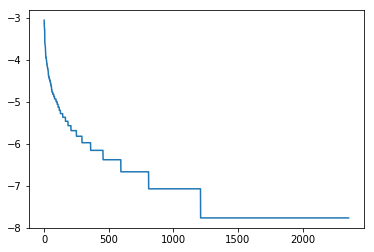

In [11]:
plt.plot(is_trade)
plt.show()

# 2. item_category_list

In [12]:
item_category_list_grouped_1 = feature_group(ads_data, 'item_category_list', 1)
item_category_list_grouped_1 = feature_log_cal(item_category_list_grouped_1, 'item_category_list', 1)
item_category_list_grouped_1

,item_category_list,is_trade,item_category_list_1
11,7908382889764677758;7258015885215914736,2138,5.028569
12,7908382889764677758;8277336076276184272,1949,4.936014
9,7908382889764677758;5755694407684602296,1728,4.815663
10,7908382889764677758;5799347067982556520,1274,4.510860
8,7908382889764677758;509660095530134768,1266,4.504560
13,7908382889764677758;8710739180200009128,226,2.781478
1,7908382889764677758;2011981573061447208,150,2.371578
5,7908382889764677758;2642175453151805566;886888...,118,2.131627
6,7908382889764677758;3203673979138763595,79,1.730391
3,7908382889764677758;2436715285093487584,50,1.272966


In [13]:
item_category_list_grouped_0 = feature_group(ads_data, 'item_category_list', 0)
item_category_list_grouped_0 = feature_log_cal(item_category_list_grouped_0, 'item_category_list', 0)
item_category_list_grouped_0

,item_category_list,is_trade,item_category_list_0
12,7908382889764677758;8277336076276184272,148830,9.271503
9,7908382889764677758;5755694407684602296,100768,8.881519
8,7908382889764677758;509660095530134768,74154,8.574842
10,7908382889764677758;5799347067982556520,70745,8.527780
11,7908382889764677758;7258015885215914736,50917,8.198895
1,7908382889764677758;2011981573061447208,9413,6.510790
13,7908382889764677758;8710739180200009128,6858,6.194114
6,7908382889764677758;3203673979138763595,2167,5.042042
3,7908382889764677758;2436715285093487584,1916,4.918938
5,7908382889764677758;2642175453151805566;886888...,1788,4.849796


In [14]:
item_category_list_grouped_1.to_csv('./feature_data/ads_data/item_category_list_grouped_1.txt', sep=' ', index=False, encoding='utf-8')
item_category_list_grouped_0.to_csv('./feature_data/ads_data/item_category_list_grouped_0.txt', sep=' ', index=False, encoding='utf-8')

# 3. item_property_list

In [15]:
item_property_list_grouped_1 = feature_group(ads_data, 'item_property_list', 1)
item_property_list_grouped_1 = feature_log_cal(item_property_list_grouped_1, 'item_property_list', 1)
item_property_list_grouped_1.head()

,item_property_list,is_trade,item_property_list_1
2143,5131280576272319091;4621934203383159480;316326...,111,-3.120498
1525,5131280576272319091;2636395404473730413;462193...,95,-3.276151
2329,5977512434884267894;5131280576272319091;263639...,88,-3.352691
117,2072967855524022579;2072967855524022579;513128...,88,-3.352691
2141,5131280576272319091;4621934203383159480;316326...,65,-3.655641


In [16]:
item_property_list_grouped_0 = feature_group(ads_data, 'item_property_list', 0)
item_property_list_grouped_0 = feature_log_cal(item_property_list_grouped_0, 'item_property_list', 0)
item_property_list_grouped_0.head()

,item_property_list,is_trade,item_property_list_0
9381,5131280576272319091;4621934203383159480;316326...,2467,-1.483556
7024,5131280576272319091;2636395404473730413;462193...,2420,-1.502791
9377,5131280576272319091;4621934203383159480;316326...,2383,-1.518198
7071,5131280576272319091;2636395404473730413;462193...,2244,-1.578299
3976,2636395404473730413;7344985833148694227;124376...,2241,-1.579636


In [17]:
item_property_list_grouped_1.to_csv('./feature_data/ads_data/item_property_list_grouped_1.txt', sep=' ', index=False, encoding='utf-8')
item_property_list_grouped_0.to_csv('./feature_data/ads_data/item_property_list_grouped_0.txt', sep=' ', index=False, encoding='utf-8')

# 4. item_brand_id

In [18]:
item_brand_id_grouped_1 = feature_group(ads_data, 'item_brand_id', 1)
item_brand_id_grouped_1 = feature_log_cal(item_brand_id_grouped_1, 'item_brand_id', 1)
item_brand_id_grouped_1.head()

,item_brand_id,is_trade,item_brand_id_1
752,7838285046767229711,1505,0.545759
491,5051039799137810159,359,-0.887467
41,448955875785543916,265,-1.191060
660,6793286343174833903,179,-1.583404
75,739382823914881928,142,-1.814962


In [19]:
item_brand_id_grouped_0 = feature_group(ads_data, 'item_brand_id', 0)
item_brand_id_grouped_0 = feature_log_cal(item_brand_id_grouped_0, 'item_brand_id', 0)
item_brand_id_grouped_0.head()

,item_brand_id,is_trade,item_brand_id_0
1752,7838285046767229711,68241,3.505206
1591,7066302540842412840,13738,1.902326
1142,5051039799137810159,12686,1.822659
92,448955875785543916,9851,1.569733
159,739382823914881928,6400,1.138458


In [20]:
item_brand_id_grouped_1.to_csv('./feature_data/ads_data/item_brand_id_grouped_1.txt', sep=' ', index=False, encoding='utf-8')
item_brand_id_grouped_0.to_csv('./feature_data/ads_data/item_brand_id_grouped_0.txt', sep=' ', index=False, encoding='utf-8')

# 5. item_city_id

In [21]:
item_city_id_grouped_1 = feature_group(ads_data, 'item_city_id', 1)
item_city_id_grouped_1 = feature_log_cal(item_city_id_grouped_1, 'item_city_id', 1)
item_city_id_grouped_1.head()

,item_city_id,is_trade,item_city_id_1
68,7534238860363577544,2035,3.152343
67,7322157373578955368,1249,2.664190
49,5918626470536001929,1092,2.529858
32,3948283326616421003,888,2.323064
0,196257267849351217,665,2.033879


In [22]:
item_city_id_grouped_0 = feature_group(ads_data, 'item_city_id', 0)
item_city_id_grouped_0 = feature_log_cal(item_city_id_grouped_0, 'item_city_id', 0)
item_city_id_grouped_0.head()

,item_city_id,is_trade,item_city_id_0
101,7534238860363577544,152956,7.085875
99,7322157373578955368,57077,6.100126
50,3948283326616421003,53584,6.036976
78,5918626470536001929,33860,5.577959
1,196257267849351217,29611,5.443871


In [23]:
item_city_id_grouped_1.to_csv('./feature_data/ads_data/item_city_id_grouped_1.txt', sep=' ', index=False, encoding='utf-8')
item_city_id_grouped_0.to_csv('./feature_data/ads_data/item_city_id_grouped_0.txt', sep=' ', index=False, encoding='utf-8')